# REPORTE DE CALIDAD Y KPI´S
---

### Primeros pasos: Importando librerías y creación de funciones para el análisis:

In [81]:
#SE IMPORTAN LAS LIBRERÍAS QUE SERÁN USADAS A LOS LARGO DEL REPORTE:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

### Función para detectar outliers:

In [2]:
def detectar_outliers(df:pd.DataFrame,columna:str,tecnica='cajas') -> pd.DataFrame:
    """
    Función que detecta outliers en un dataframe usando una tecnica determinada.
    Parámetros:
        df: DataFrame sobre el que se realizará la detección de outliers.
        columna: columna sobre la que se realizará la detección de outliers.
        tecnica: tecnica de detección de outliers ('cajas' o 'sigmas').
    Retorna:
        DataFrame: DataFrame con los outliers detectados en una nueva columna llamada 'outlier'.
        
        (0 = outlier, 1 = no outlier)
    """

    if not 'outlier' in df.columns:
        df['outlier'] = 1

    #Detección por medio de Diagrama de Cajas:
    if tecnica == 'cajas':
        q1 = df[columna].describe().loc['25%']
        q3 = df[columna].describe().loc['75%']
        rango_IC = q3 - q1
        minimo = q1 - ((1.5) * (rango_IC))
        maximo = q3 + ((1.5) * (rango_IC))


    #Detección de outliers por medio de las 3 sigmas:
    elif tecnica == 'sigmas':
        promedio = df[columna].mean()
        stddev = df[columna].std()
        maximo = promedio + (3 * stddev)
        minimo = promedio - (3 * stddev)


    df['outlier'][(df[columna] > maximo) | (df[columna] < minimo)] = 0
    
    return df

### Función para determinar y graficar la calidad de los datos:

In [3]:
def determinar_calidad(df:pd.DataFrame,columna:str): 
    #Outliers:
    df = detectar_outliers(df,columna)

    #Datos generales:
    total = df.shape[0]
    no_nulos = df[columna].notnull().sum()
    nulos = total - no_nulos
    outliers = df[columna][df.outlier == 0].count()
    sin_errores = (total - nulos) - outliers 

    #Porcentaje de datos:
    porcentaje_nulos = round((nulos * 100)/total,2)
    porcentaje_outliers = round((outliers * 100)/total,2)
    porcentaje_sin_errores = round((sin_errores * 100)/total,2)

    #Datos para el grafico:
    titulo = f"Calidad del dato '{columna}'"
    estados = ['Outliers','Sin Errores','Valores Nulos'] 
    porcentajes = [porcentaje_outliers,porcentaje_sin_errores,porcentaje_nulos] 
    df = pd.DataFrame({"Estado":estados, 
                       "Porcentaje":porcentajes}) 

    #Grafico:
    plot = sns.barplot(x='Estado', y="Porcentaje", data=df)
    plot.set_title(titulo)
    

    for p in plot.patches:
        h, w, x = p.get_height(), p.get_width(), p.get_x()
        xy = (p.get_x() + p.get_width() / 2, p.get_height())
        plot.annotate(text=f"{h}%", xy=xy, ha='center', va='baseline',
                      fontsize = 11,color = 'black', xytext = (0,1),
                      textcoords = 'offset pixels')
    

    plt.show()

    

---
## REPORTE DE CALIDAD:

## **Tabla:** Venta
### Diccionario
| | Columna Original | Columna Normalizada | Tipo de Dato Original | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdVenta | id_venta | int64 | Clave única que identifica la venta |
| 1 | Fecha | fecha | Object | Fecha de la venta realizada |
| 2 | Fecha_Entrega | fecha_entrega | Object | Fecha de entrega de la venta |
| 3 | IdCanal | id_canal | int64 | Clave única que identifica el canal de venta |
| 4 | IdCliente | id_ cliente | int64 | Clave única que identifica al cliente |
| 5 | IdSucursal | id_sucursal | int64 | Clave única que identifica a la sucursal |
| 6 | IdEmpleado | id_empleado | int64 | Clave única que identifica al empleado |
| 7 | IdProducto | id_producto | int64 | Clave única que identifica el producto de la venta|
| 8 | Precio | precio | float64 | Precio unitario del producto vendido |
| 9 | Cantidad | cantidad | float64 | Cantidad de producto de la venta realizada |

In [4]:
df_ventas = pd.read_csv('Datasets/Venta.csv')
new_names = {'IdVenta':'id_venta',
             'Fecha':'fecha',
             'Fecha_Entrega':'fecha_entrega',
             'IdCanal':'id_canal',
             'IdCliente':'id_cliente',
             'IdSucursal':'id_sucursal',
             'IdEmpleado':'id_empleado',
             'IdProducto':'id_producto',
             'Cantidad':'cantidad',
             'Precio':'precio'}
df_ventas.rename(columns=new_names,inplace=True)

#### Calidad de los datos de la columna 'Precio':

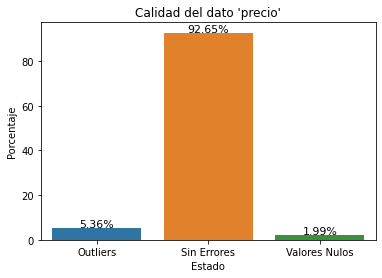

In [5]:
determinar_calidad(df_ventas,'precio')

#### Calidad de los datos de la columna 'Cantidad':

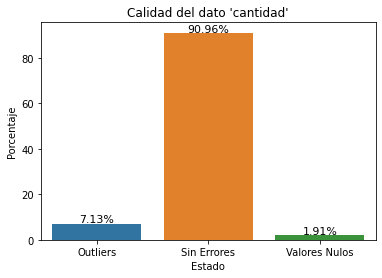

In [6]:
determinar_calidad(df_ventas,'cantidad')

## **Tabla:** Compra
| | Columna Original | Columna Normalizada | Tipo de Dato Original | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdCompra | id_compra | int64 | Clave única que identifica una compra |
| 1 | Fecha | fecha | Object | Fecha registrada de compra |
| 2 | Fecha_Año | *Columna eliminada* | int64 | Año registrado de compra |
| 3 | Fecha_Mes | *Columna eliminada* | int64 | Mes registrado de compra |
| 4 | Fecha_Periodo | *Columna eliminada* | int64 | Periodo registrado de compra  |
| 5 | IdProducto | id_producto | int64 | Clave única que identifica al producto adquirido |
| 6 | Cantidad | cantidad | int64 | Cantidad de producto adquirido en la compra |
| 7 | Precio | precio | float64 | Precio unitario del producto comprado |
| 8 | IdProveedor | id_proveedor | int64 | Clave única que identifica al proveedor |

In [7]:
df_compras = pd.read_csv('Datasets/Compra.csv')
new_names = {'IdCompra':'id_compra',
             'Fecha':'fecha',
             'IdProducto':'id_producto',
             'Cantidad':'cantidad',
             'Precio':'precio',
             'IdProveedor':'id_proveedor'}
df_compras.rename(columns=new_names,inplace=True)

#### Calidad de los datos de la columna 'Precio':

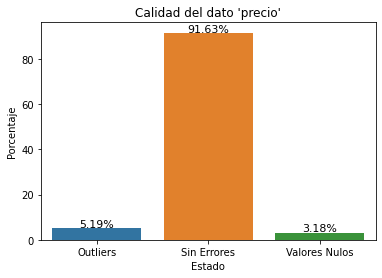

In [8]:
determinar_calidad(df_compras,'precio')

#### Calidad de los datos de la columna 'Cantidad':

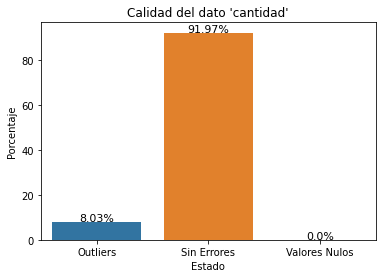

In [9]:
determinar_calidad(df_compras,'cantidad')

## **Tabla:** Gasto
| | Columna Original | Columna Normalizada | Tipo de Dato Original | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdGasto | id_gasto | int64 | Clave única que identifica el gasto |
| 1 | IdSucursal | id_sucursal | int64 | Clave única que identifica la sucursal |
| 2 | IdTipoGasto | id_tipo_gasto | int64 | Clave única que identifica el tipo de gasto |
| 3 | Fecha | fecha | Object | Fecha registrada del gasto |
| 4 | Monto | monto | float64 | Monto total del gasto |

In [10]:
df_gastos = pd.read_csv('Datasets/Gasto.csv')
new_names = {'IdGasto':'id_gasto',
             'IdSucursal':'id_sucursal',
             'IdTipoGasto':'id_tipo_gasto',
             'Fecha':'fecha',
             'Monto':'monto'}
df_gastos.rename(columns=new_names,inplace=True)

#### Calidad de los datos de la columna 'Monto':

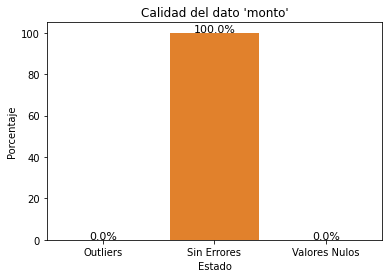

In [11]:
determinar_calidad(df_gastos,'monto')

---
## KPI'S:

#### Procederemos a hacer un análisis exploratorio de datos y en base a este definiremos nuestros kpi's

In [12]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46180 entries, 0 to 46179
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_venta       46180 non-null  int64  
 1   fecha          46180 non-null  object 
 2   fecha_entrega  46180 non-null  object 
 3   id_canal       46180 non-null  int64  
 4   id_cliente     46180 non-null  int64  
 5   id_sucursal    46180 non-null  int64  
 6   id_empleado    46180 non-null  int64  
 7   id_producto    46180 non-null  int64  
 8   precio         45260 non-null  float64
 9   cantidad       45296 non-null  float64
 10  outlier        46180 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 3.9+ MB


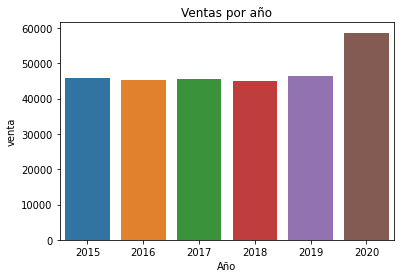

In [13]:
df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha'])
df_ventas['venta'] = df_ventas['cantidad'] * df_ventas['precio']
df_ventas_plot = df_ventas[df_ventas.outlier == 1].groupby(['fecha']).sum()['venta'].reset_index()
sns.barplot(x=df_ventas_plot.fecha.dt.year, y='venta', data=df_ventas_plot, ci=None)
plt.xlabel('Año')
plt.title('Ventas por año')
plt.show()

In [14]:
promedio = df_ventas_plot[df_ventas_plot.fecha.dt.year != 2020].groupby(df_ventas_plot.fecha.dt.year).sum().mean().venta
año_mayor_venta = df_ventas_plot[df_ventas_plot.fecha.dt.year == 2020].sum().venta
porcentaje_crecimiento = 1 - (promedio / año_mayor_venta) 
print((porcentaje_crecimiento) * 100)

15.559013984105386


#### En la gráfica podemos observar que para los años comprendidos entre 2015 y 2019 las ventas se mantuvieron casi constantes, mientras que para el año 2020 hubo un incremento de ventas de aproximadamente un 15.5% respecto al promedio de ventas de los años anteriores.

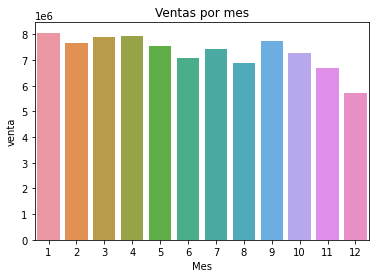

In [69]:
df_plot = df_ventas[df_ventas.outlier == 1].groupby(df_ventas['fecha'].dt.month).sum()['venta'].reset_index()
sns.barplot(x='fecha', y="venta", data=df_plot)
plt.xlabel('Mes')
plt.title('Ventas por mes')
plt.show()

In [74]:
df_plot

,fecha,venta
0,1,8064037.78
1,2,7652260.68
2,3,7908104.48
3,4,7935083.23
4,5,7539880.99
5,6,7092932.35
6,7,7411589.66
7,8,6896564.89
8,9,7740132.36
9,10,7281131.05


### Podemos notar también que, en promedio, en el mes de noviembre y especialmente en diciembre, las ventas disminuyen considerablemente.

In [16]:
df_canal_de_venta = pd.read_excel('Datasets/CanalDeVenta.xlsx')

In [17]:
df_canal_de_venta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CODIGO       3 non-null      int64 
 1   DESCRIPCION  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [18]:
df_ventas = df_ventas.merge(df_canal_de_venta, left_on='id_canal',right_on='CODIGO')

In [19]:
df_ventas.drop(columns=['CODIGO'],inplace=True)
df_ventas.rename(columns={'DESCRIPCION':'canal_de_venta'},inplace=True)
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46180 entries, 0 to 46179
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_venta        46180 non-null  int64         
 1   fecha           46180 non-null  datetime64[ns]
 2   fecha_entrega   46180 non-null  object        
 3   id_canal        46180 non-null  int64         
 4   id_cliente      46180 non-null  int64         
 5   id_sucursal     46180 non-null  int64         
 6   id_empleado     46180 non-null  int64         
 7   id_producto     46180 non-null  int64         
 8   precio          45260 non-null  float64       
 9   cantidad        45296 non-null  float64       
 10  outlier         46180 non-null  int64         
 11  venta           44392 non-null  float64       
 12  canal_de_venta  46180 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(7), object(2)
memory usage: 4.9+ MB


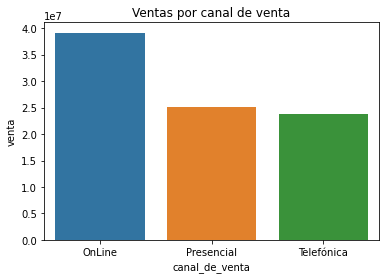

In [20]:
df_plot = df_ventas[df_ventas.outlier == 1][['canal_de_venta','venta']].groupby('canal_de_venta').sum()
sns.barplot(x=df_plot.index, y="venta", data=df_plot, ci=None)
plt.title('Ventas por canal de venta')
plt.show()

In [21]:
df_sucursal = pd.read_csv('Datasets/Sucursales.csv',sep=';')
df_sucursal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         31 non-null     int64 
 1   Sucursal   31 non-null     object
 2   Direccion  31 non-null     object
 3   Localidad  31 non-null     object
 4   Provincia  31 non-null     object
 5   Latitud    31 non-null     object
 6   Longitud   31 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


In [22]:
df_ventas2 = df_ventas.merge(df_sucursal, left_on='id_sucursal',right_on='ID')

In [23]:
df_ventas2.drop(columns=['ID','Direccion','Provincia','Latitud','Longitud','Localidad'],inplace=True)

In [29]:
df_plot = df_ventas2[df_ventas2.outlier == 1][['Sucursal','venta','cantidad']].groupby('Sucursal').sum()

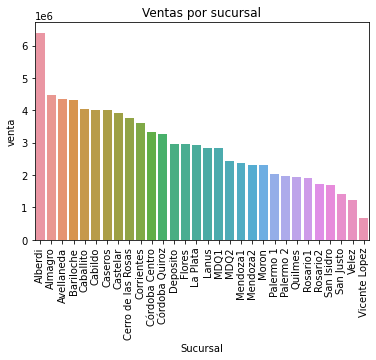

In [31]:
sns.barplot(x=df_plot.index, y="venta", data=df_plot.sort_values(by='venta',ascending=False), ci=None)
plt.title('Ventas por sucursal')
plt.xticks(rotation=90)
plt.show()

In [32]:
df_gastos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_gasto       8640 non-null   int64  
 1   id_sucursal    8640 non-null   int64  
 2   id_tipo_gasto  8640 non-null   int64  
 3   fecha          8640 non-null   object 
 4   monto          8640 non-null   float64
 5   outlier        8640 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 405.1+ KB


In [158]:
df_gastos['fecha'] = pd.to_datetime(df_gastos['fecha'])

In [179]:
df = df_gastos.groupby(df_gastos.fecha.dt.year).sum()['monto'].reset_index()

<AxesSubplot:xlabel='fecha', ylabel='monto'>

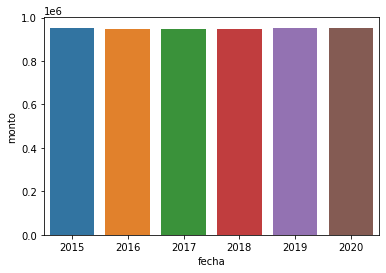

In [180]:
sns.barplot(x=df.fecha, y="monto", data=df,estimator=sum, ci=None)